# Analysis #4: Identification of insect germ cell formation type
- Author: Savandara BESSE
- Creation: 06-16-2017
- Last modification: 09-13-2019

### Required inputs
- Table information on germ cell formation: `../Data/02_Oskar_analyses/2.4/insect_germ_cell_formation_infos.csv`
- Oskar result table: `../Data/01_Oskar_identification/oskar_tracker_results/search_results.csv`

### Description
Identifies the insect programmed germ cells (PGC) types across insects based on C. Extavour's litterature review. Associates Oskar results with PGC types to create the alignments for Hemimetabola (Induction) and Holometabola (Inheritance) groups.

In [2]:
import json, progressbar, time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import generic_protein

import os

data_path = '../Data/02_Oskar_analyses'

from Bio import Entrez
Entrez.email = 'savandara.besse@gmail.com'

%matplotlib inline

## Step 1: Germ cell formation information distribution

- Based on C.G Extavour literature review

In [3]:
CGE_table = pd.read_csv(os.path.join(data_path, '2.4/insect_germ_cell_formation_infos.csv'), sep=',')

#### Add PGC mode

In [4]:
tmp = []
bar = progressbar.ProgressBar()
for index in bar(CGE_table['Species'].index) :
    if CGE_table['Mode of PGC Specification'][index] == 'P' :
        tmp.append([CGE_table['Species'][index], 'Inheritance'])
    elif CGE_table['Mode of PGC Specification'][index] == 'E' :
        tmp.append([CGE_table['Species'][index], 'Induction'])
    else :
        tmp.append([CGE_table['Species'][index], 'NA'])

specification_mode = pd.DataFrame(tmp, columns = ['Species', 'specification mode'])
df = CGE_table.merge(specification_mode, on='Species')

100% (138 of 138) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


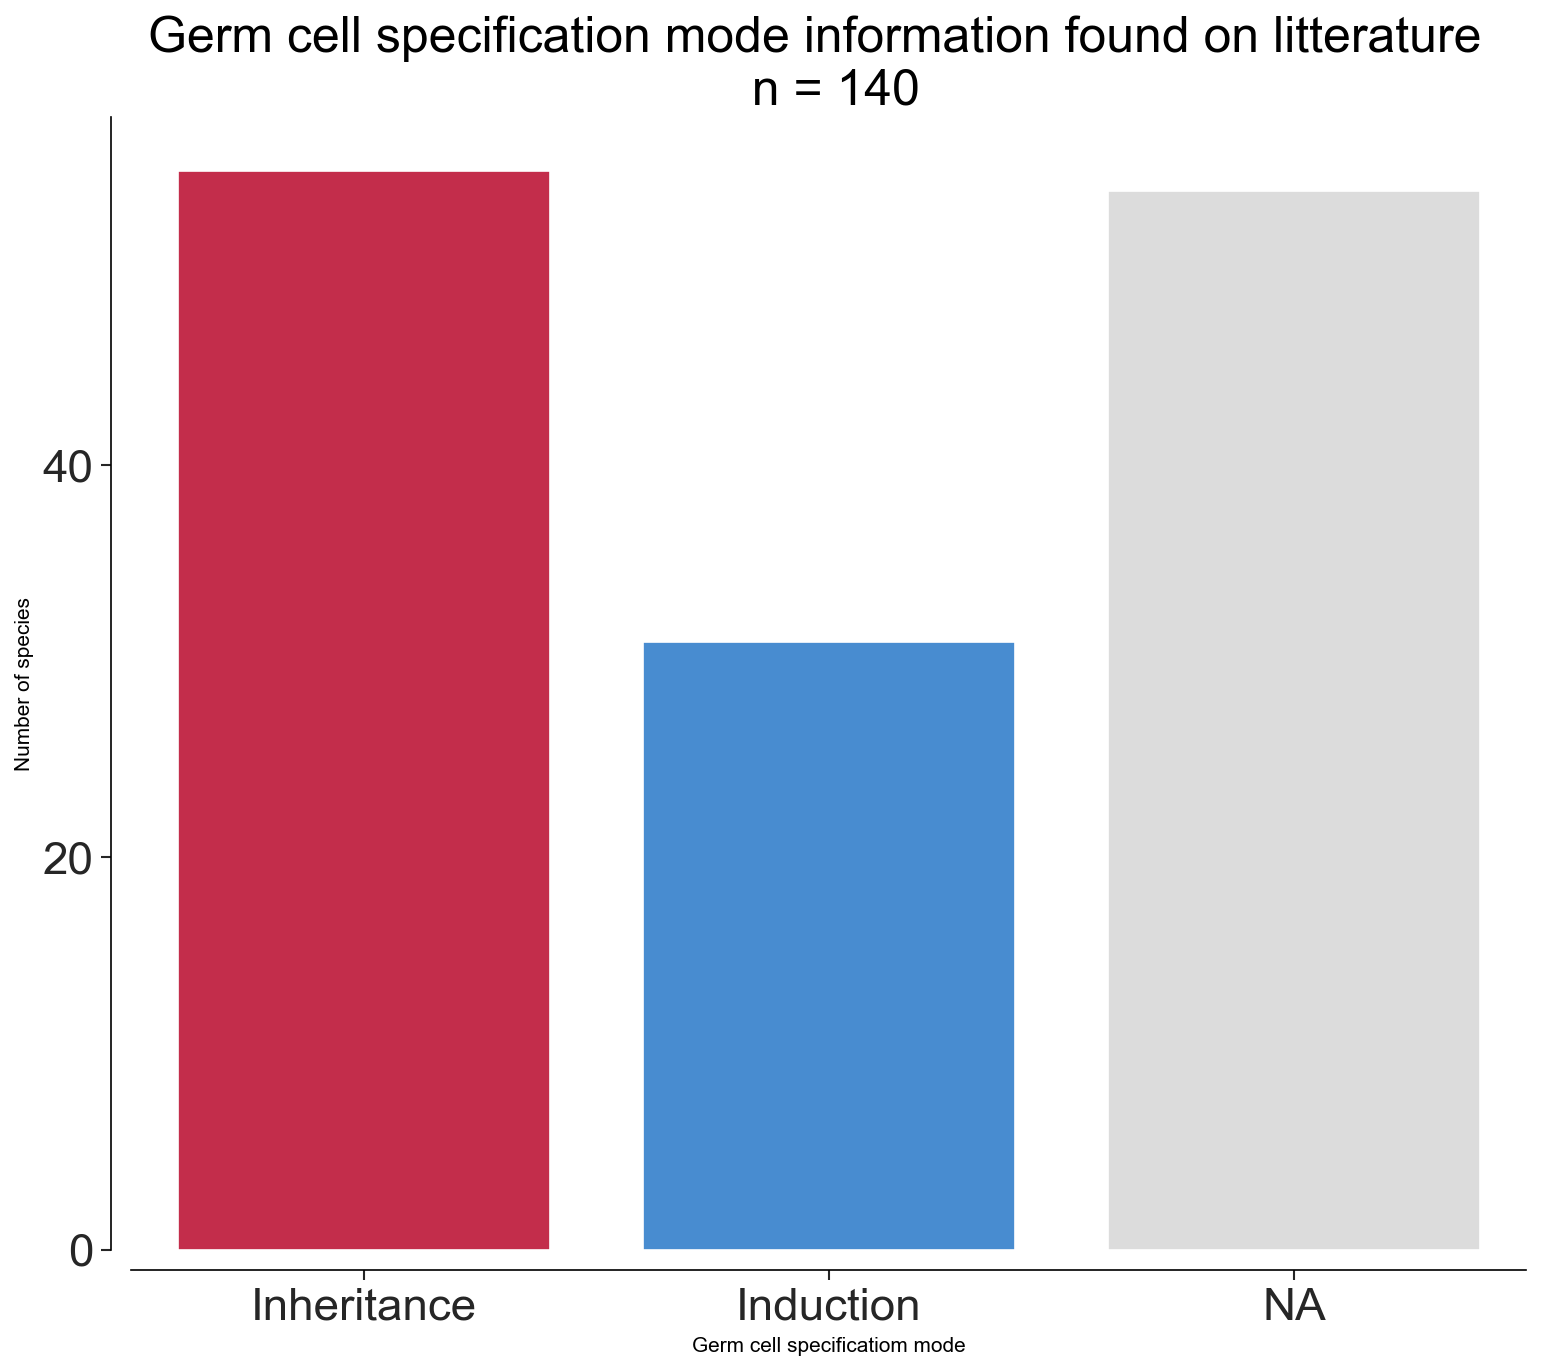

In [5]:
plt.figure(figsize=(12, 10), dpi=150)
plt.locator_params(axis='y', nbins=5)
sns.set_context("paper", font_scale=2.5)
sns.set_style("ticks")
sns.despine(offset=10)

sns.countplot(data=df, x='specification mode', order=['Inheritance', 'Induction', 'NA'], palette=["#DC143C", "#318CE7", "#DCDCDC"])
plt.ylabel('Number of species')
plt.xlabel('Germ cell specificatiom mode')
plt.title('Germ cell specification mode information found on litterature  \n n = '+ str(len(df)))

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=True) 

# fig.savefig('../Figures/SVG/Info_PGC_litterature.svg')
# fig.savefig('../Figures/PDF/Info_PGC_litterature.pdf')
plt.show()

## Result:
### 1. Specification mode by order

In [6]:
insect_evolution = ['Zygentoma',
'Ephemeroptera',
'Plecoptera',
'Orthoptera',
'Phasmatodea',
'Blattodea',
'Thysanoptera',
'Hemiptera', 
'Psocoptera',
'Hymenoptera',
'Neuroptera', 
'Coleoptera',
'Trichoptera',
'Lepidoptera',
'Mecoptera',
'Diptera']

# colors = [colormap.order(i) for i in insect_evolution]

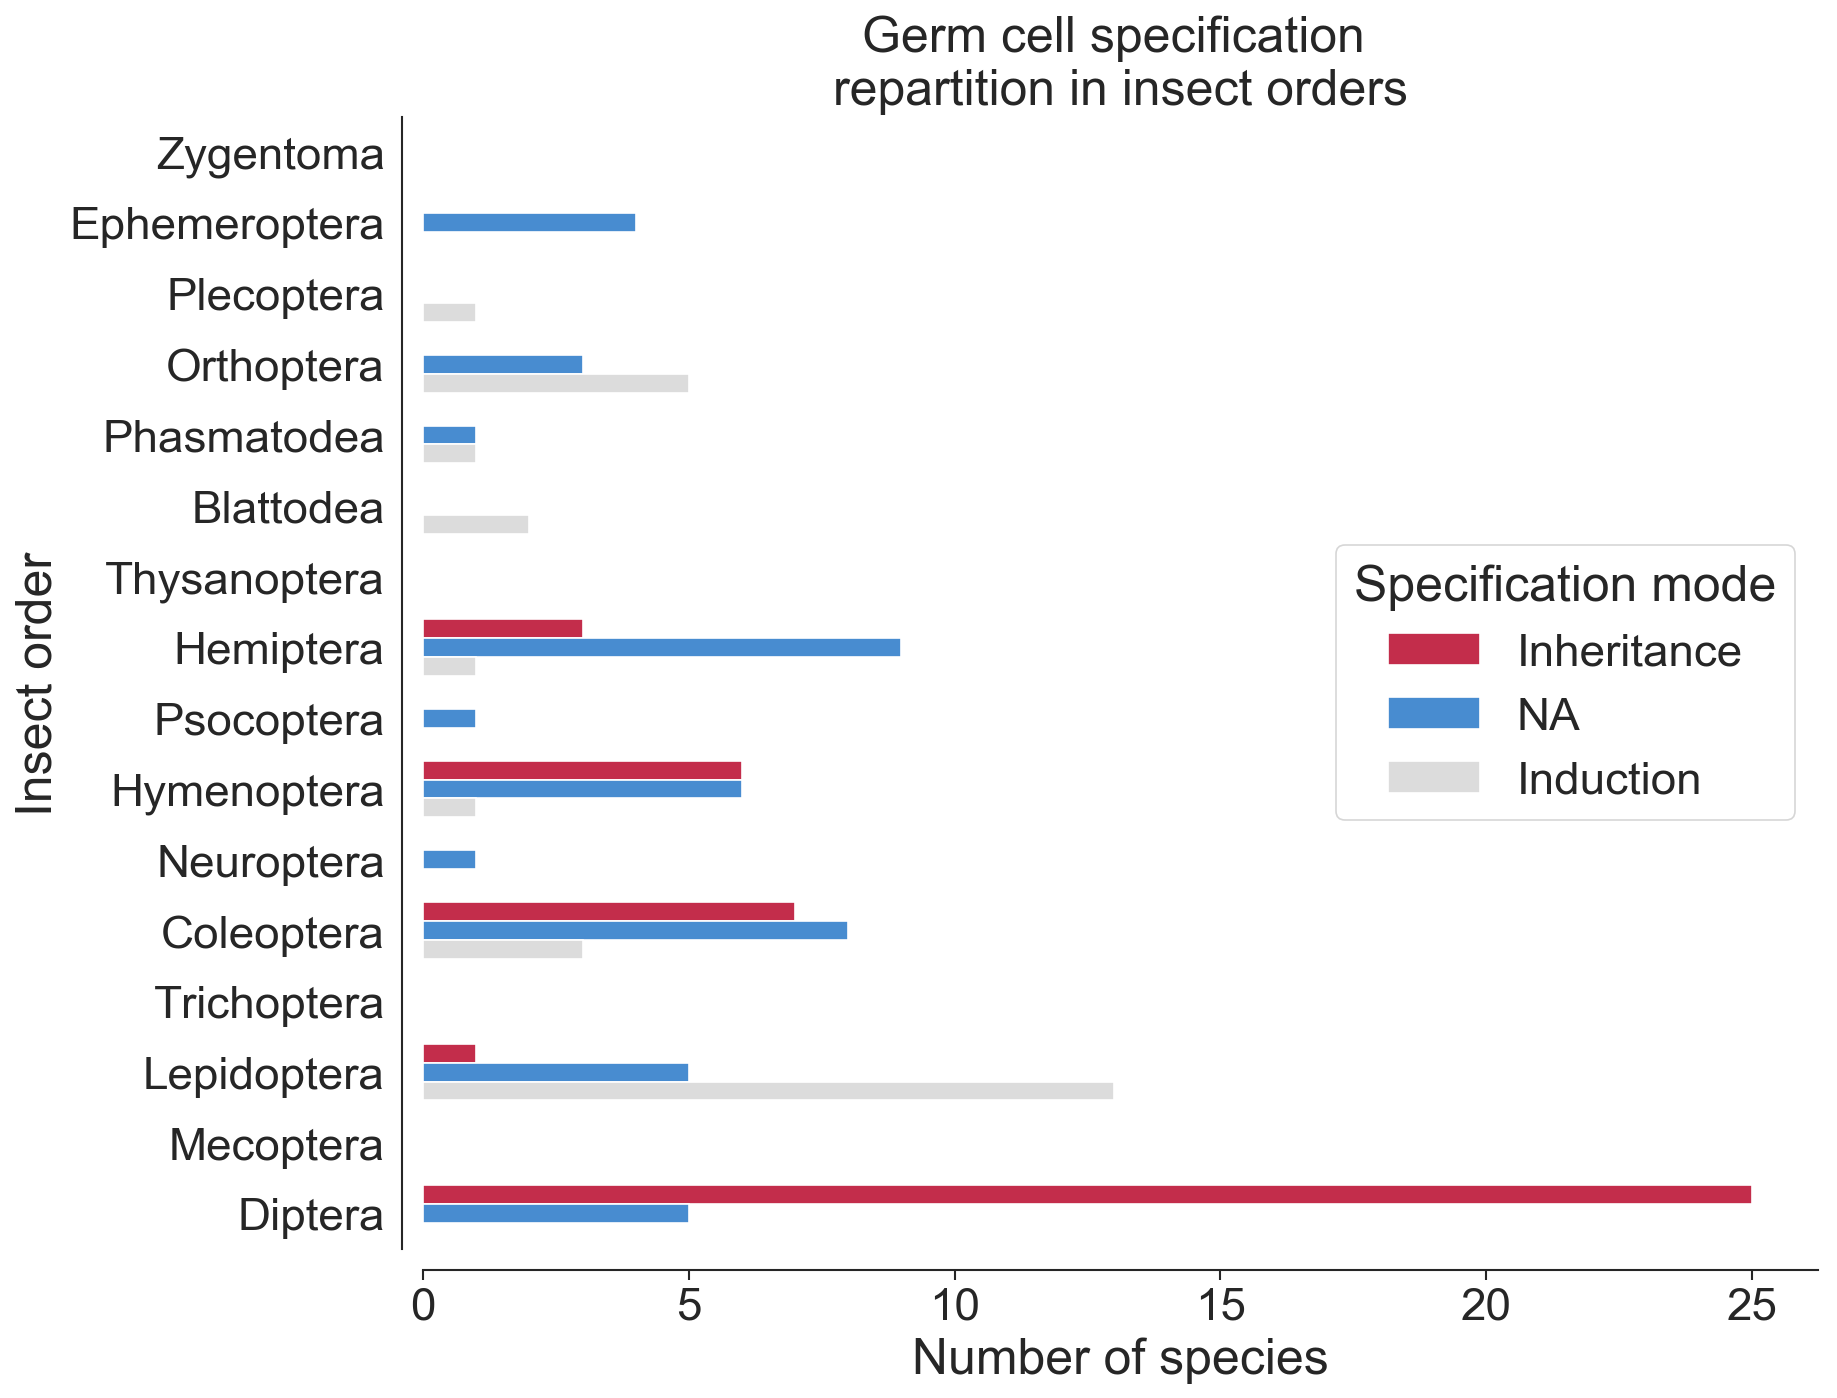

In [7]:
plt.figure(figsize=(12, 10), dpi=150)
plt.locator_params(axis='y', nbins=5)
sns.set_context("paper", font_scale=2.5)
sns.set_style("ticks")
sns.despine(offset=10)

sns.countplot(data=df, y='Order', hue='specification mode', order=insect_evolution, palette=["#DC143C", "#318CE7", "#DCDCDC"])
plt.ylabel('Insect order')
plt.xlabel('Number of species')
plt.legend(title='Specification mode', loc='center right')
plt.title('Germ cell specification \nrepartition in insect orders')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True) 

# fig.savefig('../Figures/SVG/Info_PGC_litterature_Orders.svg')
# fig.savefig('../Figures/PDF/Info_PGC_litterature_Orders.pdf')
plt.show()

## Step 2. : Associate Oskar to hemi / holo groups

- Definition of PGC mode per insect order based on Holometabola and Hemimetabola groups mentionned in this paper: 
> _Lynch JA, Ozüak O, Khila A, Abouheif E, Desplan C, Roth S._ __The phylogenetic origin of oskar coincided with the origin of maternally provisioned germ plasm and pole cells at the base of the Holometabola.__ PLoS Genet. 2011;7(4):e1002029. doi:10.1371/journal.pgen.1002029

In [8]:
PGC_mode = {
    'Collembola':'Induction',
    'Diplura':'Induction',
    'Archaeognatha':'Induction',
    'Zygentoma':'Induction',
    'Odonata':'Induction',
    'Ephemeroptera':'Induction',
    'Zoraptera':'Induction',
    'Dermaptera':'Induction',
    'Plecoptera':'Induction',
    'Orthoptera':'Induction',
    'Mantophasmatodea':'Induction',
    'Grylloblattodea':'Induction',
    'Embioptera':'Induction',
    'Phasmatodea':'Induction',
    'Mantodea':'Induction',
    'Blattodea':'Induction',
    'Isoptera':'Induction',
    'Thysanoptera':'Induction',
    'Hemiptera':'Induction',
    'Psocoptera':'Induction',
    'Phthiraptera': 'Induction',
    'Hymenoptera':'Inheritance',
    'Raphidioptera':'Inheritance',
    'Megaloptera':'Inheritance',
    'Neuroptera':'Inheritance',
    'Strepsiptera':'Inheritance',
    'Coleoptera':'Inheritance',
    'Trichoptera':'Inheritance',
    'Lepidoptera':'Inheritance',
    'Siphonaptera':'Inheritance',
    'Mecoptera':'Inheritance',
    'Diptera':'Inheritance'
}

def set_germ_cell_formation(x):
    return PGC_mode[x]

In [9]:
search_metadata = pd.read_csv('../Data/01_Oskar_identification/oskar_tracker_results/search_results.csv')

In [10]:
search_metadata['germ cell specification'] = search_metadata['order_name'].apply(set_germ_cell_formation)

In [11]:
search_metadata.groupby('germ cell specification', as_index=False).sum()

,germ cell specification,index,hits,filtered_hits
0,Induction,168114,39,32.0
1,Inheritance,518253,483,378.0


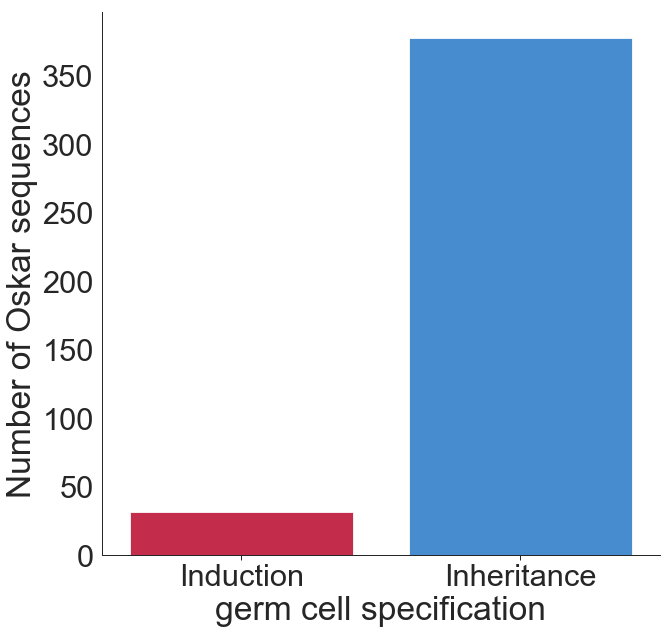

In [12]:
sns.set_context("paper", font_scale=3.5)
sns.set_style("ticks")
sns.despine(offset=10)
data = search_metadata.groupby('germ cell specification', as_index=False).sum()
sns.barplot(data=data, x='germ cell specification', y='filtered_hits', palette=["#DC143C", "#318CE7"])

plt.ylabel('Number of Oskar sequences')

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(10, 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True) 
plt.show()

## 3. Save OSKAR - LOTUS - OSK hemi / holo alignments

### Loading FASTA consensus

In [13]:
OSKAR_FASTA = '../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.fasta'
LOTUS_FASTA = '../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.LOTUS_domain.fasta'
OSK_FASTA = '../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.OSK_domain.fasta'

### Define inheritance and induction sub table

In [14]:
def save_oskar_pgc_alignment(gcs_mode, fastaFile, outFile):
    my_records = []
    handle = SeqIO.parse(fastaFile, 'fasta')
    seqs = [s for s in handle]
    orders = search_metadata[search_metadata['germ cell specification'] == gcs_mode]['order_name'].values
    for seq in seqs:
        order = seq.description.split('|')[-2]
        if order in orders:
            my_records.append(seq)
    SeqIO.write(my_records, outFile, "fasta")

In [15]:
save_oskar_pgc_alignment("Inheritance", OSKAR_FASTA, os.path.join(data_path, '2.4/FASTA/OSKAR_holometabola.fasta'))
save_oskar_pgc_alignment("Inheritance", LOTUS_FASTA, os.path.join(data_path, '2.4/FASTA/LOTUS_holometabola.fasta'))
save_oskar_pgc_alignment("Inheritance", OSK_FASTA, os.path.join(data_path, '2.4/FASTA/OSK_holometabola.fasta'))
save_oskar_pgc_alignment("Induction", OSKAR_FASTA, os.path.join(data_path, '2.4/FASTA/OSKAR_hemimetabola.fasta'))
save_oskar_pgc_alignment("Induction", LOTUS_FASTA, os.path.join(data_path, '2.4/FASTA/LOTUS_hemimetabola.fasta'))
save_oskar_pgc_alignment("Induction", OSK_FASTA, os.path.join(data_path, '2.4/FASTA/OSK_hemimetabola.fasta'))

In [16]:
len(search_metadata[search_metadata['filtered_hits'] > 0]['species'].unique())

350